In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
np.random.seed(0)

In [51]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

In [52]:
num_samples = 200
num_features = 2

In [53]:
# Generate random feature data
X = 10 * np.random.rand(num_samples, num_features) - 5

In [54]:
coefficients = np.array([[1.0], [1.0]])  # Shape (2, 1)
bias = -1

In [55]:
coefficients.shape

(2, 1)

In [56]:
# Calculate the log-odds (logit)
log_odds = bias + np.dot(X, coefficients).flatten() + 0.5 * np.random.randn(num_samples)

In [57]:
probabilities = logistic_function(log_odds)

# Generate binary labels based on a threshold (e.g., 0.5)
labels = (probabilities > 0.5).astype(int)

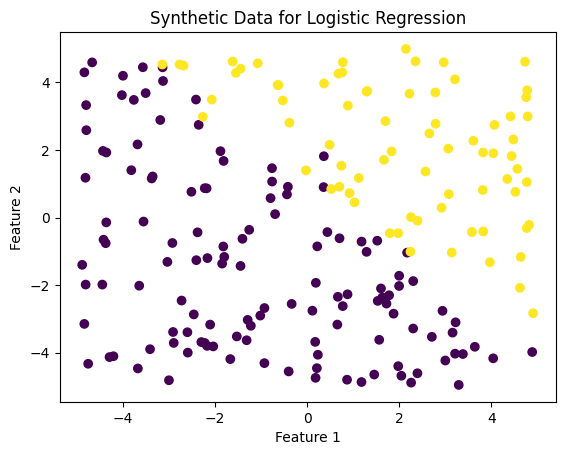

In [58]:
# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Data for Logistic Regression")
plt.show()

In [59]:
def objective(y, y_pred):
     # Ensure y_pred is within a small epsilon to avoid numerical issues
    epsilon = 1e-15
    y_pred = np.maximum(epsilon, np.minimum(1 - epsilon, y_pred))
     
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [60]:
def predict(x, weights, b):
    return logistic_function(np.dot(x, weights) + b)

In [61]:
def gradient(y, y_pred, X):
    
    X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))
    
    y = y[:, np.newaxis]
    error = y_pred - y
    return np.dot(error.T, X_with_intercept)

Optimal weights: [[1.01553451]
 [1.01688463]]
optimal bias:  [-0.78947624]
Minimum Loss Value: 0.1628945929940397


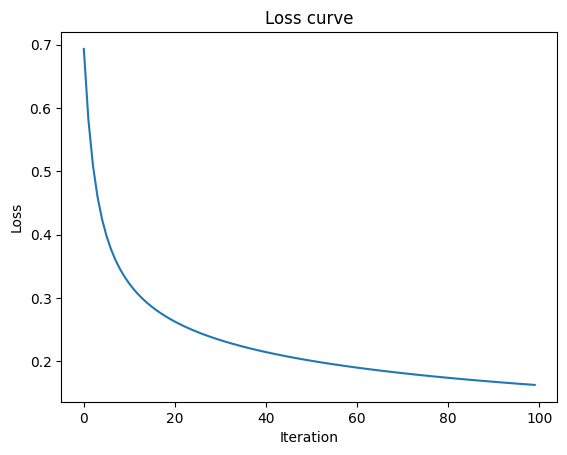

In [62]:
learning_rate = 0.005

n_iterations = 1000

w1_opt = 0.5
w2_opt = -0.5
b_opt = 0
w_opt = np.array([[w1_opt], [w2_opt]])

losses = []
for i in range(n_iterations):
    preds = predict(x=X, weights=w_opt, b=b_opt)
    
    # print(preds.shape)
    
    grad = gradient(y=labels, y_pred=preds, X=X).reshape(-1,1)
    
    w_opt -= learning_rate * grad[1:, :]
    b_opt -= learning_rate * grad[0, :]
    
    loss = objective(y=labels, y_pred=preds)
    
    # print(loss)
    
    losses.append(loss)

print(f"Optimal weights: {w_opt}")
print(f"optimal bias: ", b_opt)
print(f"Minimum Loss Value: {losses[-1]}")

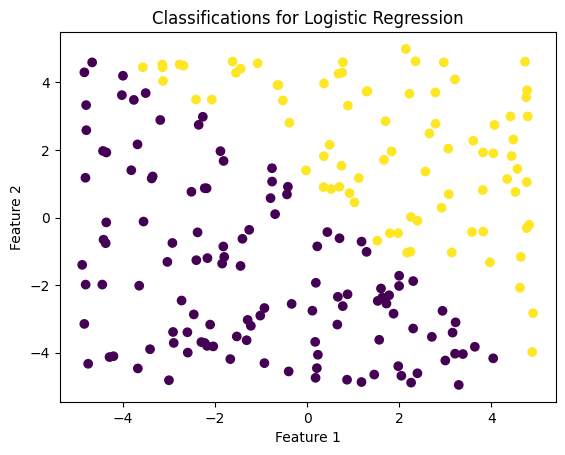

In [63]:
# plot loss curve
iterations = np.arange(n_iterations)
plt.plot(iterations, losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss curve")
plt.show()

In [64]:
predictions = predict(x=X, weights=w_opt, b=b_opt)
rounded_predictions = (predictions > 0.5).astype(int)

# Scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=rounded_predictions)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classifications for Logistic Regression")
plt.show()

Number of correctly classified examples: 190
Accuracy: 95.0 %


In [62]:
# Compare the two arrays element-wise
correctly_classified = (labels == rounded_predictions.flatten())

# Count the number of True values (correct classifications)
num_correct = np.sum(correctly_classified)

# Calculate the accuracy as a percentage
accuracy = (num_correct / len(labels)) * 100

print("Number of correctly classified examples:", num_correct)
print("Accuracy:", accuracy, "%")

Number of correctly classified examples: 196
Accuracy: 98.0 %
